# Neural Network Library - Project Milestone 1 Demo

### **CSE473s: Computational Intelligence - Fall 2025**

### **Team 5**  

| Name | Student ID |
|------|------------|
| Abdelghaffar Essam | 2100428 |
| Ingy Ahmed Sherif | 2100648 |
| Kareem Saleh Hassan | 2100909 |
| Mariam Mohamed Sameh | 2100260 |

**GitHub Repository:** [Neural Network Library](https://github.com/Senior2Projects/Neural_Network_Library.git)

<div style="page-break-after: always;"></div>

## Library Design & Architecture

- **Custom Neural Network Library**:  
  - Implemented forward and backward propagation.  
  - Modular design: `Layers`, `Loss Functions`, `Optimizers`.  
  - Supports batch training and multiple output neurons.

- **TensorFlow Model**:  
  - Sequential model with `Input`, `Dense` layers.  
  - Uses `SGD` optimizer and `mean_squared_error` loss.  
  - Easily extendable for more complex architectures.

**Design Choices Explained**:  
- Activation: `tanh` chosen for XOR due to outputs in [-1, 1].  
- Learning rate: 0.5 to allow faster convergence.  
- Epochs: 5000 for thorough training on small dataset.  
- Hidden units: 4 for sufficient capacity to model XOR.

## Setup and Imports

First, we'll import the necessary libraries and our custom neural network implementation.

In [1]:
%load_ext autoreload
%autoreload 2
# Import required libraries
import numpy as np
import sys
import time

# Add library to path
sys.path.insert(0, '../')

# Import our neural network library
from lib import Network, Dense, ReLU, Sigmoid, Tanh, Softmax, MSE, SGD, plot_losses, plot_decision_boundary

## Part 1: XOR Problem Setup

We'll start with the classic XOR dataset, which is a simple binary classification problem that requires a non-linear decision boundary. The inputs are bipolar (-1 or 1) and the target outputs follow the XOR logic.

In [2]:
# XOR dataset
X = np.array([
    [-1,-1],
    [-1,1],
    [1,-1],
    [1,1]
], dtype=float)

y = np.array([
    [-1],
    [1],
    [1],
    [-1]
], dtype=float)

### Training the Custom Neural Network

Now we'll build and train our custom neural network. The architecture consists of:
- Input layer: 2 neurons (for 2D inputs)
- Hidden layer: 4 neurons with Tanh activation
- Output layer: 1 neuron with Tanh activation

We'll use Mean Squared Error (MSE) loss and Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.5.

Epoch 0, Loss: 1.000264
Epoch 500, Loss: 0.000897
Epoch 1000, Loss: 0.000365
Epoch 1500, Loss: 0.000225
Epoch 2000, Loss: 0.000161
Epoch 2500, Loss: 0.000124
Epoch 3000, Loss: 0.000101
Epoch 3500, Loss: 0.000085
Epoch 4000, Loss: 0.000073
Epoch 4500, Loss: 0.000064

Network Architecture:
Layer 0: Dense | Weights: (2, 4) | Biases: (1, 4)
Layer 1: Tanh
Layer 2: Dense | Weights: (4, 1) | Biases: (1, 1)
Layer 3: Tanh


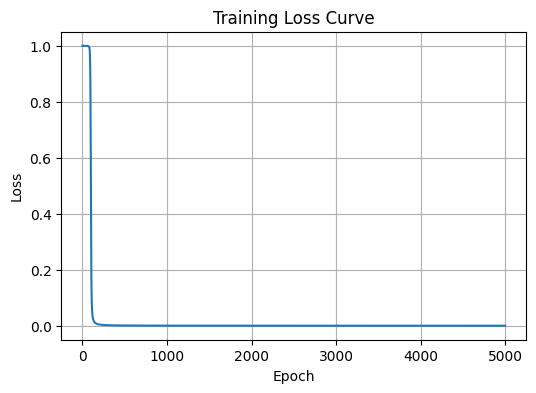


VISUALIZATION: Binary Decision Boundary


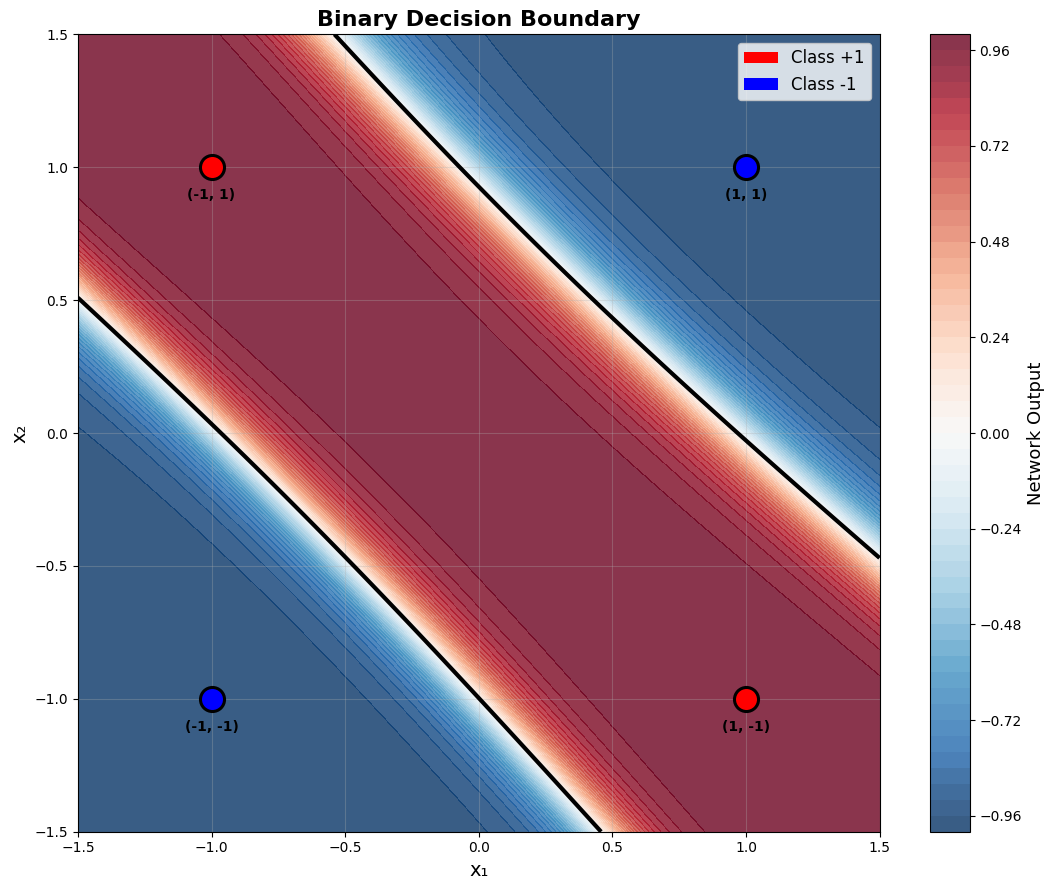

Binary decision boundary visualization complete!


In [3]:
model = Network([
    Dense(2, 4),
    Tanh(),
    Dense(4, 1),
    Tanh()
])

loss_fn = MSE()
optimizer = SGD(learning_rate=0.5)

start_custom = time.time()
model.train(X, y, loss_fn, optimizer, epochs=5000, verbose=True)
custom_time = time.time() - start_custom

model.summary()

plot_losses(model.loss_history)
plot_decision_boundary(model, X, y)

## Part 2: Gradient Checking

We implement a gradient checking function to validate that our backpropagation implementation is correct. This uses numerical differentiation (finite differences) to compare against our analytical gradients for all weight and bias parameters in Dense layers.

In [4]:
def gradient_check(model, X, y, loss_fn, epsilon=1e-5, tol=1e-7):
    """
    Performs gradient checking for all Dense layers in the model.
    
    Arguments:
        model    : Network object
        X, y     : Input and target output
        loss_fn  : Loss class (e.g., MSE)
        epsilon  : Small value for numerical gradient
        tol      : Tolerance for max difference
    """
    
    # 1. Forward and backward pass to compute analytical gradients
    y_pred = model.forward(X)
    grad_output = loss_fn.grad(y_pred, y)
    model.backward(grad_output)
    
    for idx, layer in enumerate(model.layers):
        if hasattr(layer, 'W'):
            print(f"\n--- Layer {idx} ---")
            
            # ----- Gradient for weights -----
            num_grad_W = np.zeros_like(layer.W)
            for i in range(layer.W.shape[0]):
                for j in range(layer.W.shape[1]):
                    old_val = layer.W[i,j]
                    
                    layer.W[i,j] = old_val + epsilon
                    loss_plus = loss_fn.loss(model.forward(X), y)
                    
                    layer.W[i,j] = old_val - epsilon
                    loss_minus = loss_fn.loss(model.forward(X), y)
                    
                    num_grad_W[i,j] = (loss_plus - loss_minus) / (2*epsilon)
                    layer.W[i,j] = old_val  # reset
            
            max_diff_W = np.max(np.abs(num_grad_W - layer.dW))
            print(f"Max difference in W: {max_diff_W}")
            
            # ----- Gradient for biases -----
            num_grad_b = np.zeros_like(layer.b)
            for i in range(layer.b.shape[1]):
                old_val = layer.b[0,i]
                
                layer.b[0,i] = old_val + epsilon
                loss_plus = loss_fn.loss(model.forward(X), y)
                
                layer.b[0,i] = old_val - epsilon
                loss_minus = loss_fn.loss(model.forward(X), y)
                
                num_grad_b[0,i] = (loss_plus - loss_minus) / (2*epsilon)
                layer.b[0,i] = old_val  # reset
            
            max_diff_b = np.max(np.abs(num_grad_b - layer.db))
            print(f"Max difference in b: {max_diff_b}")
            
            if max_diff_W < tol and max_diff_b < tol:
                print("Gradients match within tolerance.")
            else:
                print("Warning: Gradients may be incorrect.")

gradient_check(model, X, y, loss_fn)



--- Layer 0 ---
Max difference in W: 2.5242046002233245e-14
Max difference in b: 4.1575873603247326e-14
Gradients match within tolerance.

--- Layer 2 ---
Max difference in W: 2.711057019069013e-14
Max difference in b: 1.6719691766069883e-14
Gradients match within tolerance.


## Part 3: Comparing results with TensorFlow

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Custom model predictions:
Input: [-1. -1.], Predicted: -0.9921, True: -1.0
Input: [-1.  1.], Predicted: 0.9940, True: 1.0
Input: [ 1. -1.], Predicted: 0.9924, True: 1.0
Input: [1. 1.], Predicted: -0.9916, True: -1.0

TensorFlow model predictions:
Input: [-1. -1.], Predicted: -0.9936, True: -1.0
Input: [-1.  1.], Predicted: 0.9935, True: 1.0
Input: [ 1. -1.], Predicted: 0.9952, True: 1.0
Input: [1. 1.], Predicted: -0.9937, True: -1.0

Max difference between custom model and TensorFlow predictions: 0.002756
Custom model training time: 1.2550 sec
TensorFlow training time: 224.5549 sec
Final custom model loss: 0.000057
Final TensorFlow model loss: 0.000036

VISUALIZATION: Binary Decision Boundary


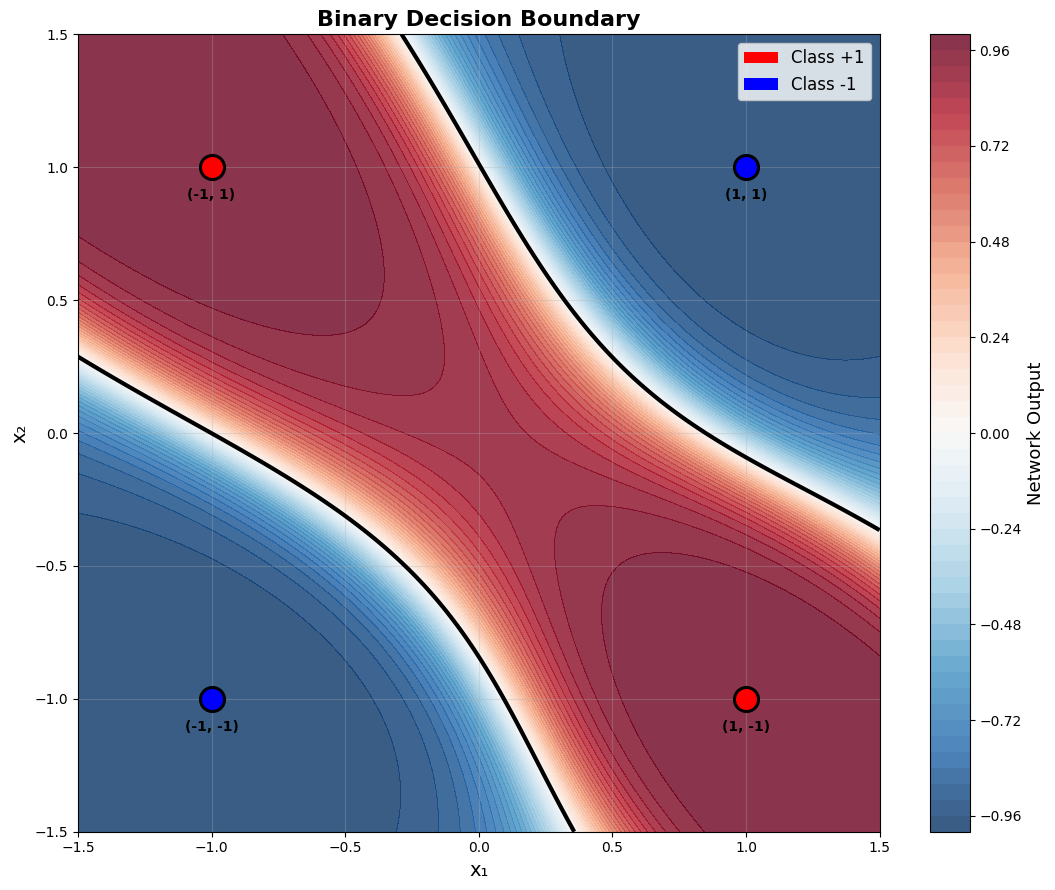

Binary decision boundary visualization complete!


In [6]:
import tensorflow as tf
from tensorflow import keras

# --- 1. Custom model training ---
y_pred = model.forward(X)
final_custom_loss = loss_fn.loss(y_pred, y)

# --- 2. TensorFlow model training ---
tf_model = keras.Sequential([
    keras.Input(shape=(2,)),       
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='tanh')
])
tf_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.5),
                 loss='mean_squared_error')

start_tf = time.time()
tf_model.fit(X, y, epochs=5000, verbose=0)
tf_time = time.time() - start_tf

y_tf_pred = tf_model.predict(X)
final_tf_loss = tf_model.evaluate(X, y, verbose=0)

# --- 3. Compare predictions ---
diff = np.abs(y_pred - y_tf_pred)
max_diff = np.max(diff)

# --- 4. Print results ---
print("\nCustom model predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_pred[i][0]:.4f}, True: {y[i][0]}")

print("\nTensorFlow model predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_tf_pred[i][0]:.4f}, True: {y[i][0]}")

print(f"\nMax difference between custom model and TensorFlow predictions: {max_diff:.6f}")
print(f"Custom model training time: {custom_time:.4f} sec")
print(f"TensorFlow training time: {tf_time:.4f} sec")
print(f"Final custom model loss: {final_custom_loss:.6f}")
print(f"Final TensorFlow model loss: {final_tf_loss:.6f}")

# --- 5. Plot decision boundary for TensorFlow model ---
plot_decision_boundary(lambda x: tf_model(x).numpy(), X, y)

### **Model Comparison**

| Aspect                | Custom Model       | TensorFlow Model       |
|-----------------------|-----------------|----------------------|
| **Training Time**      | Less | Much more (optimized)   |
| **Ease of Implementation** | Harder        | Easier            |
| **Flexibility**        | High           | Medium             |
| **Debuggability**      | Easier        | Slightly complex   |
| **Integration**        | Manual         | Built-in functions|


---

### **General Conclusions**

1. **Custom model:**  
   - Full control over architecture and training.  
   - Easier to debug and understand learning behavior.  
   - Requires more manual coding and careful tuning.  

2. **TensorFlow model:**  
   - Fast to implement for standard tasks.  
   - Optimized performance with built-in layers and GPU support.  
   - Less internal control, but easier to scale.

---

### **Effect of Changing Parameters**

| Parameter       | Effect on Model Behavior                                           |
|-----------------|------------------------------------------------------------------|
| **Learning Rate** | Higher → faster convergence but risk of overshooting; Lower → slower but stable |
| **Epochs**        | More → better convergence but may overfit; Fewer → faster but undertrained |
| **Activation Functions** | `tanh` smooths, `relu` faster training, `sigmoid` saturates easily |
| **Hidden Units / Layers** | More → captures complex patterns but risk overfitting; Fewer → simpler and faster |

**Summary:**  

- **Custom model**: Great for learning and experimentation.  
- **TensorFlow model**: Ideal for rapid prototyping and scaling.  
- Hyperparameters (learning rate, epochs, architecture) directly affect convergence and performance.

## Challenges & Lessons Learned

- Implementing and debugging backward propagation in the custom library.  
- Matching results and performance with TensorFlow.  
- Handling training time differences and plotting decision boundaries.  
- Learned the impact of hyperparameters (learning rate, epochs, hidden units) on convergence.  
- Comparing custom vs library models highlights trade-offs in ease of implementation and flexibility.